In [1]:
import pandas as pd
from pathlib import Path

In [2]:
import numpy as np 
import pandas as pd 

# PLOT
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import OrderedDict

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

from xgboost import XGBClassifier
import xgboost as xgb

# Read file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/test.csv.zip
/kaggle/input/train.csv.zip
/kaggle/input/description.md
/kaggle/input/sample_submission.csv
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/sample_submission.csv.zip
/kaggle/input/tabular-playground-series-may-2022/test.csv.zip
/kaggle/input/tabular-playground-series-may-2022/train.csv.zip
/kaggle/input/tabular-playground-series-may-2022/description.md
/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv
/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv.zip


In [3]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/test.csv')


In [4]:
train.head().T


,0,1,2,3,4
id,0,1,2,3,4
f_00,-0.249088,-0.312833,-0.370032,-1.011059,0.756528
f_01,0.530642,0.033082,1.501016,-0.34185,0.5037
f_02,0.335227,-0.571193,0.288983,1.415175,0.935057
f_03,0.806819,1.311494,0.077866,-2.12866,-2.321849
f_04,-0.18419,0.991718,-0.329701,1.137287,-0.002466
f_05,-0.560442,-0.138249,0.030314,-3.200017,0.058981
f_06,1.253767,1.834627,0.384582,0.289945,-0.163493
f_07,2,2,1,7,1
f_08,1,1,3,2,0


In [5]:
def check(df):
    col_list = df.columns.values
    rows = []
    for col in col_list:
        tmp = (col,
              df[col].dtype,
              df[col].isnull().sum(),
              df[col].count(),
              df[col].nunique(),
              df[col].unique())
        rows.append(tmp)
    df = pd.DataFrame(rows) 
    df.columns = ['feature','dtype','nan','count','nunique','unique']
    return df


In [6]:
check(train)


,feature,dtype,nan,count,nunique,unique
0,id,int64,0,800000,800000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,f_00,float64,0,800000,800000,"[-0.249088480127198, -0.312832922727397, -0.37..."
2,f_01,float64,0,800000,800000,"[0.5306415748448242, 0.0330816597210825, 1.501..."
3,f_02,float64,0,800000,800000,"[0.3352271666250545, -0.5711931387274104, 0.28..."
4,f_03,float64,0,800000,800000,"[0.8068193746089833, 1.3114937880364494, 0.077..."
5,f_04,float64,0,800000,800000,"[-0.1841904948777198, 0.9917182861837608, -0.3..."
6,f_05,float64,0,800000,800000,"[-0.5604420211992777, -0.1382494980384291, 0.0..."
7,f_06,float64,0,800000,800000,"[1.2537666397727585, 1.8346269755915832, 0.384..."
8,f_07,int64,0,800000,16,"[2, 1, 7, 3, 4, 0, 5, 6, 8, 9, 10, 11, 12, 13,..."
9,f_08,int64,0,800000,16,"[1, 3, 2, 0, 5, 4, 6, 9, 7, 8, 10, 11, 12, 13,..."


In [7]:
def color_negative_red(val):
    color = 'red' if val  0 else 'black'
    return 'color: %s' % color


SyntaxError: expected 'else' after 'if' expression (3411213911.py, line 2)

In [8]:
cm = sns.light_palette('green', as_cmap = True)
train.drop('id', axis = 1).describe().T.style.background_gradient(cmap = cm).applymap(color_negative_red)


NameError: name 'color_negative_red' is not defined

In [9]:
test.head().T


,0,1,2,3,4
id,800000,800001,800002,800003,800004
f_00,0.194491,0.073512,0.990606,0.621236,-0.143469
f_01,1.180926,1.215182,1.390944,-1.282787,0.952492
f_02,-1.47457,1.887183,0.765208,0.83689,-0.146993
f_03,-1.969979,0.6641,-0.204159,1.208417,0.362883
f_04,-0.632224,1.445916,-0.265682,-0.212496,-0.10512
f_05,-0.908537,0.407144,0.051791,-1.729244,-1.208656
f_06,-0.929414,-0.965463,2.526925,-0.741488,-1.317498
f_07,3,1,6,3,2
f_08,0,0,4,1,1


In [10]:
check(test)


,feature,dtype,nan,count,nunique,unique
0,id,int64,0,100000,100000,"[800000, 800001, 800002, 800003, 800004, 80000..."
1,f_00,float64,0,100000,100000,"[0.1944912018912512, 0.0735117261702696, 0.990..."
2,f_01,float64,0,100000,100000,"[1.1809257689158985, 1.215182024126669, 1.3909..."
3,f_02,float64,0,100000,100000,"[-1.4745698238397122, 1.887182790222917, 0.765..."
4,f_03,float64,0,100000,100000,"[-1.9699786768331715, 0.6640998767720103, -0.2..."
5,f_04,float64,0,100000,100000,"[-0.6322242017974853, 1.4459160587911233, -0.2..."
6,f_05,float64,0,100000,100000,"[-0.908536553676396, 0.4071437174007382, 0.051..."
7,f_06,float64,0,100000,100000,"[-0.9294142783609558, -0.9654628420274068, 2.5..."
8,f_07,int64,0,100000,15,"[3, 1, 6, 2, 0, 4, 5, 7, 8, 10, 9, 15, 11, 13,..."
9,f_08,int64,0,100000,15,"[0, 4, 1, 2, 3, 6, 5, 7, 10, 9, 8, 11, 13, 12,..."


In [11]:
test.drop('id', axis = 1).describe().T.style.background_gradient(cmap = cm).applymap(color_negative_red)


NameError: name 'color_negative_red' is not defined

In [12]:
target_count = train['target'].value_counts()
target_count


target
0    411088
1    388912
Name: count, dtype: int64

In [13]:
train['target'].describe()


count    800000.000000
mean          0.486140
std           0.499808
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: target, dtype: float64

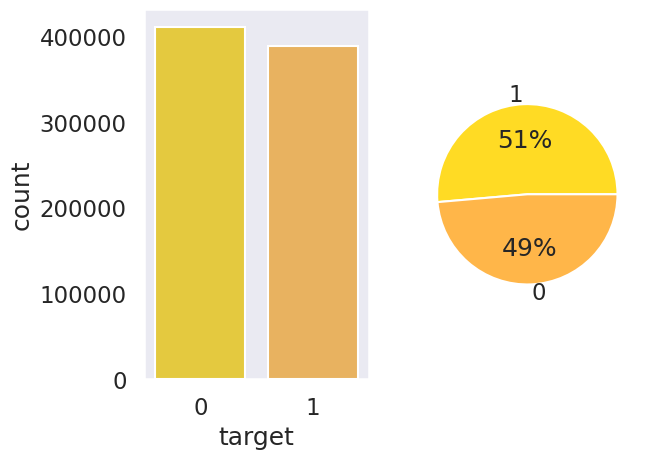

In [14]:
sns.set('talk', 'dark','spring_r')

fig,axs = plt.subplots(ncols = 2, )

sns.countplot(x=train['target'], data=train, ax = axs[0])

labels = ['1','0']
plt.pie(target_count, labels = labels, autopct = '%.0f%%')

plt.show()


In [15]:
train['f_27'].value_counts()


f_27
BBBBBBCJBC    10
BBBBBBDPCB    10
BBBBBBDKBC    10
BCBBBBCLBC    10
ADBBBACQBC    10
              ..
ACBACAAKEF     1
BAADCBEQAE     1
BEBABACJBE     1
BAAAABCKDB     1
BBBBAAAGBC     1
Name: count, Length: 670919, dtype: int64

In [16]:
test['f_27'].value_counts()


f_27
BBABAACLCB    4
BBBBBBBRCD    4
BBABCADMBB    4
BBBBCACQCC    3
BDBBABCHCD    3
             ..
BBBCBBCSCF    1
BBACCBCRFF    1
BCBCBBDHDA    1
BCAABAFRBA    1
AEBBAABGBB    1
Name: count, Length: 97480, dtype: int64

In [17]:
from collections import OrderedDict

def encord(input):
    dict = OrderedDict.fromkeys(input,0)
        
    for ch in input:
        dict[ch] += 1
        
    output = ''
    for k, v in dict.items():
        output = output + k + str(v)
    return output
        


In [18]:
f_27_en=[]
for i in range(len(train['f_27'])):
    a = train['f_27'][i]
    st = encord(a)
    f_27_en.append(st)
    
train['f_27_en'] = f_27_en
train['f_27_en'].value_counts() 


f_27_en
B4C3A2D1          389
B4A3C2D1          380
B5C2A2D1          356
B5A3C2            347
A3C3B3D1          334
                 ... 
B2C1E3A2G1D1        1
B3C2A1E1G1D1M1      1
A2F2D1B2E2C1        1
A5D1G1C2E1          1
B5D2S1E1A1          1
Name: count, Length: 222443, dtype: int64

In [19]:
f_27_ent=[]
for i in range(len(test['f_27'])):
    a = test['f_27'][i]
    st = encord(a)
    f_27_ent.append(st)
    
test['f_27_ent'] = f_27_ent
test['f_27_ent'].value_counts() 


f_27_ent
B3A4C2D1        45
B5C2A2D1        45
B4C3A2D1        45
A3C3B3D1        42
B4A3C2D1        40
                ..
A3E2B3G1C1       1
A1E3B4Q1D1       1
A4C1B1D2K1E1     1
B2A2C4P1F1       1
A3F2D2G1B2       1
Name: count, Length: 58111, dtype: int64

In [20]:
label = LabelEncoder()

en_27 = pd.DataFrame(label.fit_transform(train['f_27']))
train['en_27'] = en_27

enc_27 = pd.DataFrame(label.fit_transform(train['f_27_en']))
train['f_27_enc'] = enc_27

enct_27 = pd.DataFrame(label.fit_transform(test['f_27_ent']))
test['f_27_enc'] = enct_27

display(train['en_27'].head(10))
display(train['f_27_enc'].head(10))
display(test['f_27_enc'].head(10))


0    167064
1    467185
2    586821
3    357031
4     44099
5     23142
6    115536
7    144431
8    171399
9    527160
Name: en_27, dtype: int64

0     66282
1    157893
2    142159
3    134263
4     22437
5     91962
6      2226
7     63579
8     35438
9    189449
Name: f_27_enc, dtype: int64

0    45650
1     5461
2    54873
3     2634
4    27661
5    34491
6    33620
7    50286
8    52597
9    33429
Name: f_27_enc, dtype: int64

In [21]:
train.head().T


,0,1,2,3,4
id,0,1,2,3,4
f_00,-0.249088,-0.312833,-0.370032,-1.011059,0.756528
f_01,0.530642,0.033082,1.501016,-0.34185,0.5037
f_02,0.335227,-0.571193,0.288983,1.415175,0.935057
f_03,0.806819,1.311494,0.077866,-2.12866,-2.321849
f_04,-0.18419,0.991718,-0.329701,1.137287,-0.002466
f_05,-0.560442,-0.138249,0.030314,-3.200017,0.058981
f_06,1.253767,1.834627,0.384582,0.289945,-0.163493
f_07,2,2,1,7,1
f_08,1,1,3,2,0


In [22]:
test.head().T


,0,1,2,3,4
id,800000,800001,800002,800003,800004
f_00,0.194491,0.073512,0.990606,0.621236,-0.143469
f_01,1.180926,1.215182,1.390944,-1.282787,0.952492
f_02,-1.47457,1.887183,0.765208,0.83689,-0.146993
f_03,-1.969979,0.6641,-0.204159,1.208417,0.362883
f_04,-0.632224,1.445916,-0.265682,-0.212496,-0.10512
f_05,-0.908537,0.407144,0.051791,-1.729244,-1.208656
f_06,-0.929414,-0.965463,2.526925,-0.741488,-1.317498
f_07,3,1,6,3,2
f_08,0,0,4,1,1


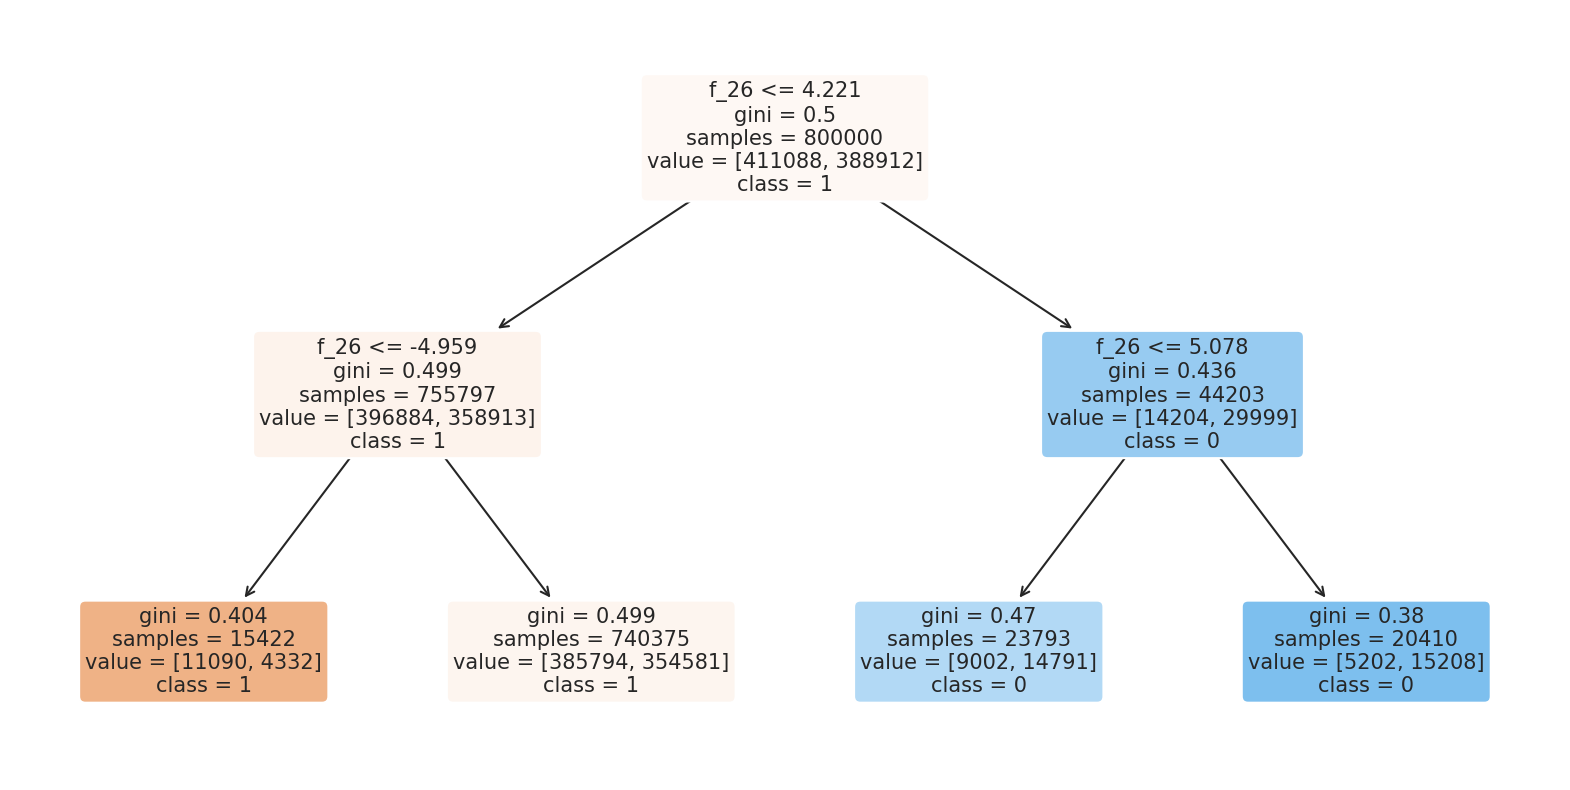

In [23]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit( train[["f_26"]], train["target"])
_, ax = plt.subplots(figsize=(20, 10))

plot_tree(
    clf,
    feature_names=["f_26"],
    class_names=train["target"].unique().astype(str),
    filled=True,
    ax=ax,
    fontsize=15,
    rounded =  True,
)

plt.show()


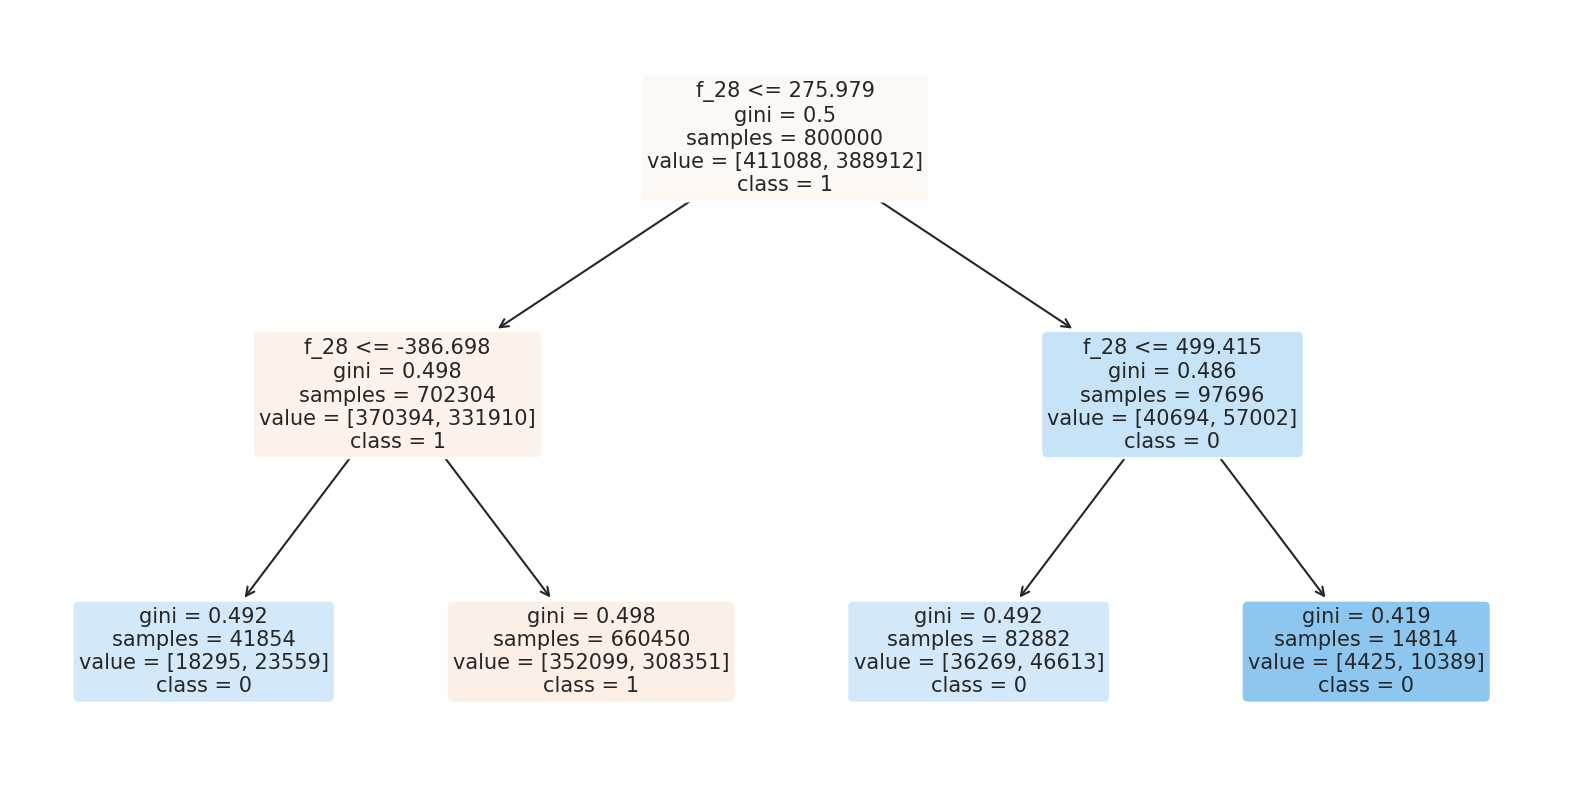

In [24]:
lf = DecisionTreeClassifier(max_depth=5)
clf.fit( train[["f_28"]], train["target"])
_, ax = plt.subplots(figsize=(20, 10))

plot_tree(
    clf,
    feature_names=["f_28"],
    class_names=train["target"].unique().astype(str),
    filled=True,
    ax=ax,
    fontsize=15,
    rounded = True
)

plt.show()


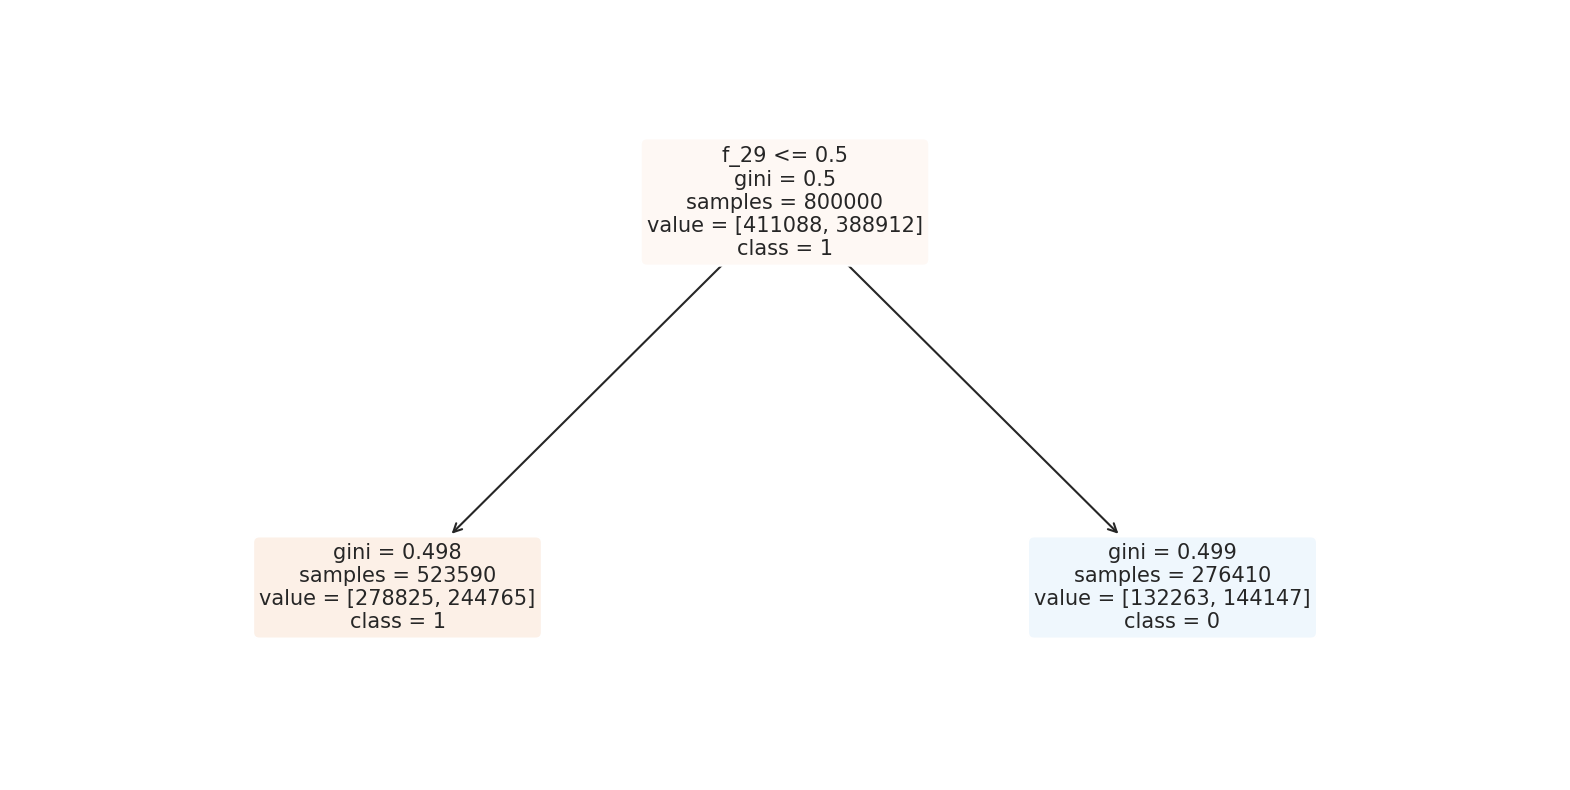

In [25]:
lf = DecisionTreeClassifier(max_depth=3)
clf.fit( train[["f_29"]], train["target"])
_, ax = plt.subplots(figsize=(20, 10))

plot_tree(
    clf,
    feature_names=["f_29"],
    class_names=train["target"].unique().astype(str),
    filled=True,
    ax=ax,
    fontsize=15,
    rounded = True
)

plt.show()


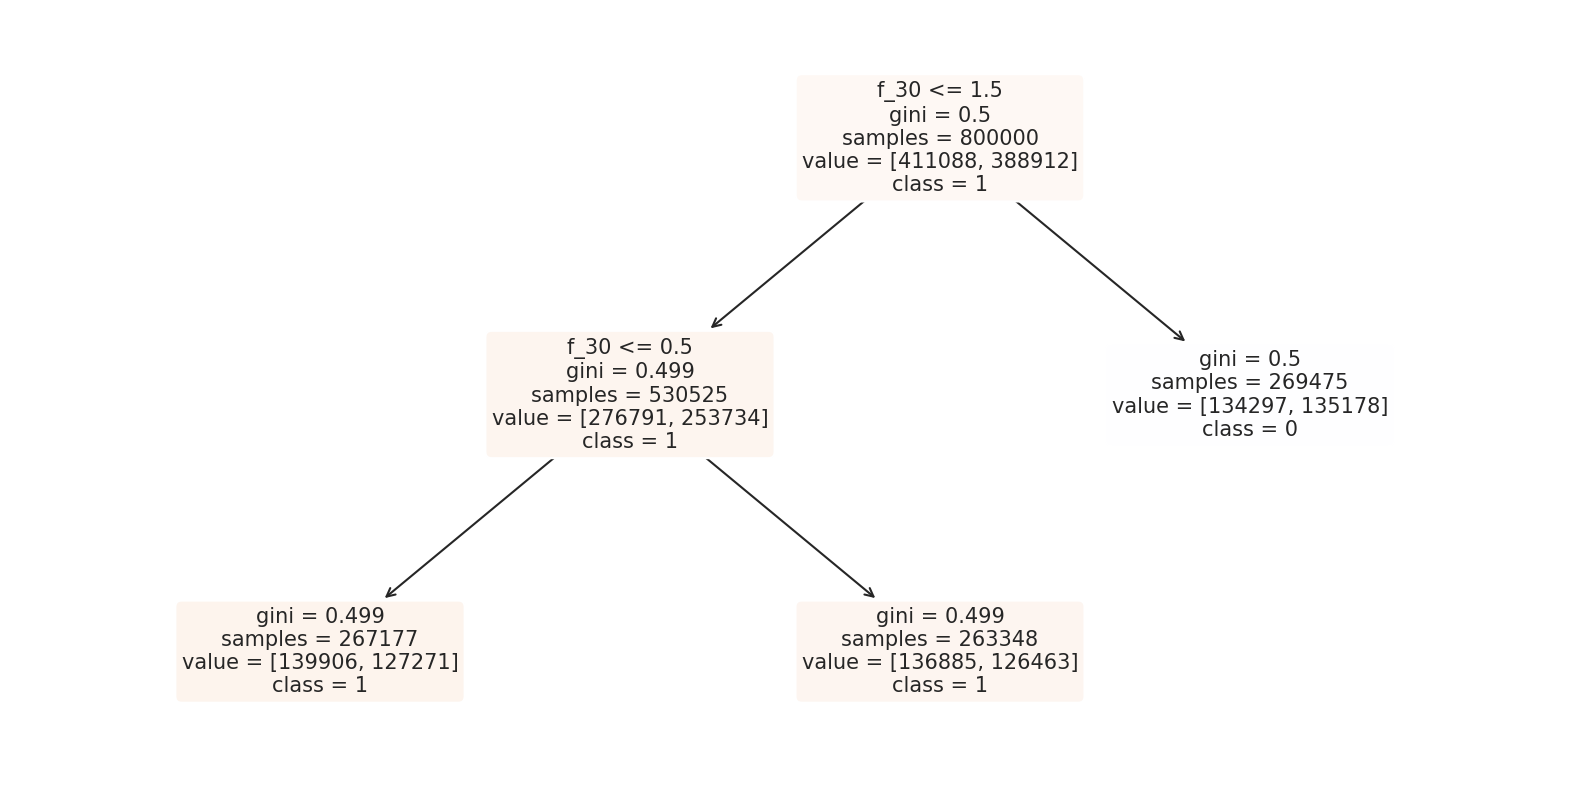

In [26]:
lf = DecisionTreeClassifier(max_depth=3)
clf.fit( train[["f_30"]], train["target"])
_, ax = plt.subplots(figsize=(20, 10))

plot_tree(
    clf,
    feature_names=["f_30"],
    class_names=train["target"].unique().astype(str),
    filled=True,
    ax=ax,
    fontsize=15,
    rounded = True
)

plt.show()


In [27]:
#Memory reduce
for col in train.columns:
    if train[col].dtype == "float64":
        train[col]=pd.to_numeric(train[col], downcast="float")
    if train[col].dtype == "int64":
        train[col]=pd.to_numeric(train[col], downcast="integer")
        
for col in test.columns:
    if test[col].dtype == "float64":
        test[col]=pd.to_numeric(test[col], downcast="float")
    if test[col].dtype == "int64":
        test[col]=pd.to_numeric(test[col], downcast="integer")


In [28]:
train.info(),test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        800000 non-null  int32  
 1   f_00      800000 non-null  float32
 2   f_01      800000 non-null  float32
 3   f_02      800000 non-null  float32
 4   f_03      800000 non-null  float32
 5   f_04      800000 non-null  float32
 6   f_05      800000 non-null  float32
 7   f_06      800000 non-null  float32
 8   f_07      800000 non-null  int8   
 9   f_08      800000 non-null  int8   
 10  f_09      800000 non-null  int8   
 11  f_10      800000 non-null  int8   
 12  f_11      800000 non-null  int8   
 13  f_12      800000 non-null  int8   
 14  f_13      800000 non-null  int8   
 15  f_14      800000 non-null  int8   
 16  f_15      800000 non-null  int8   
 17  f_16      800000 non-null  int8   
 18  f_17      800000 non-null  int8   
 19  f_18      800000 non-null  int8   
 20  f_19

(None, None)

In [29]:
X = train.drop(['id','target','f_27','en_27','f_27_en'], axis = 1).copy()

y = train['target'].copy()
X_test = test.drop(['id','f_27','f_27_ent' ], axis = 1).copy()

del train
del test


In [30]:
params = {'tree_method':'gpu_hist',
          'n_estimators': 10000,
          'colsample_bytree': 0.5, 
          'subsample': 0.5, 
          'learning_rate': 0.02, 
          'max_depth': 6, 
         }


In [31]:
splits = 5
seed = 42
skf = StratifiedKFold(n_splits = splits, shuffle=True, random_state=seed)

preds = []
scores = []

for fold, (idx_train, idx_valid) in enumerate(skf.split(X, y)):
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]

    model = XGBClassifier(**params,
                            booster= 'gbtree',
                            eval_metric = 'auc',
                            gpu_id=0,
                            predictor="gpu_predictor",
                            use_label_encoder=False)
    
    model.fit(X_train,y_train,
              eval_set=[(X_valid,y_valid)],
              early_stopping_rounds=100,
              verbose=False)
    
    pred_valid = model.predict_proba(X_valid)[:,1]
    fpr, tpr, _ = roc_curve(y_valid, pred_valid)
    score = auc(fpr, tpr)
    scores.append(score)

    test_preds = model.predict_proba(X_test)[:,1]
    preds.append(test_preds)
    
    print("fold : ", fold , "score : ", score)


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [21:55:14] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [21:55:14] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [21:55:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist

XGBoostError: [21:55:14] /workspace/src/tree/updater_gpu_hist.cu:781: Exception in gpu_hist: [21:55:14] /workspace/src/tree/updater_gpu_hist.cu:787: Check failed: ctx_->gpu_id >= 0 (-1 vs. 0) : Must have at least one device
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xb27f2a) [0x7fa75b74cf2a]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xb3e95a) [0x7fa75b76395a]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xb483cd) [0x7fa75b76d3cd]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x460c79) [0x7fa75b085c79]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x46176c) [0x7fa75b08676c]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4c54f7) [0x7fa75b0ea4f7]
  [bt] (6) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7fa75ad86ef0]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7fa7ca9afe2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7fa7ca9ac493]



Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xb27f2a) [0x7fa75b74cf2a]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xb485c9) [0x7fa75b76d5c9]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x460c79) [0x7fa75b085c79]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x46176c) [0x7fa75b08676c]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4c54f7) [0x7fa75b0ea4f7]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7fa75ad86ef0]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7fa7ca9afe2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7fa7ca9ac493]
  [bt] (8) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x7fa7cb3774d8]



In [32]:
print(scores)


[]


In [33]:
#seed = 42

#X_train, X_valid, y_train, y_valid = train_test_split(X,y)
    
#model = RandomForestClassifier(random_state = seed)
    
#model.fit(X_train,y_train)
            
#pred_valid = model.predict_proba(X_valid)[:,1]
#fpr, tpr, _ = roc_curve(y_valid, pred_valid)
#score = auc(fpr, tpr) 

#test_preds = model.predict_proba(X_test)[:,1]

#print(score)


In [34]:
sub = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv')


In [35]:
sub['target'] = test_preds
sub.to_csv('submission.csv', index = False)
sub.head()  


NameError: name 'test_preds' is not defined